In [1]:
# 使用PCA 进行噪音过滤
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
# 可视化
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks': [], 'yticks': []},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
   

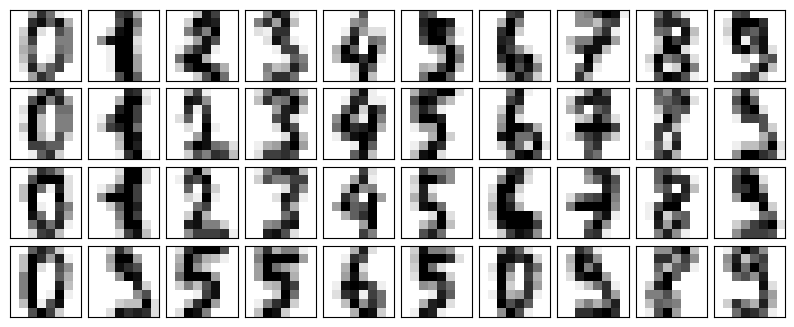

In [4]:
plot_digits(digits.data)

In [6]:
# 人为添加噪音
rng = np.random.RandomState(42)
noisy = rng.normal(digits.data, 2)
noisy.shape

(1797, 64)

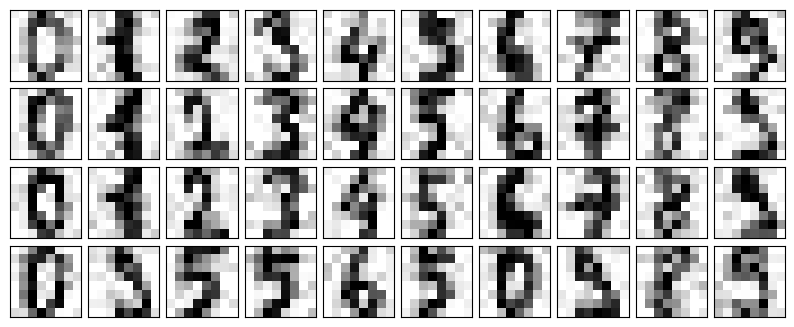

In [7]:
plot_digits(noisy)

In [9]:
pca = PCA(0.50).fit(noisy)
x_dr = pca.transform(noisy)

In [10]:
x_dr.shape

(1797, 6)

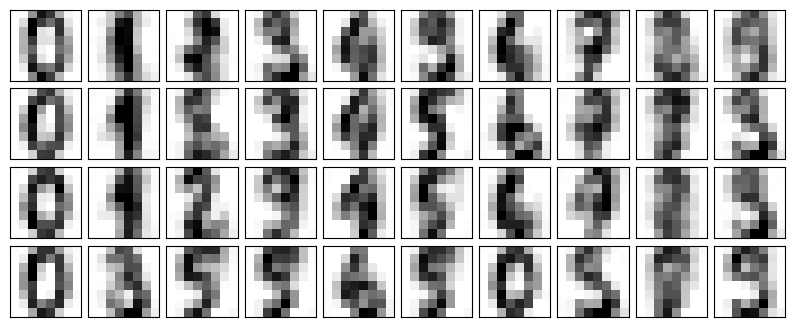

In [12]:
pca = PCA(0.50,svd_solver="full").fit(noisy)
x_dr = pca.transform(noisy)
x_dr.shape
# 逆转降维
x_dr = pca.inverse_transform(x_dr)
plot_digits(x_dr)